In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# Análise exploratória de Data Science

In [3]:
ds = pd.read_csv('ds_tidy.csv', parse_dates=['date'])
ds.head()

,turma,date,student,topicos,component,relevance,learn,satisfaction,pace,tool,algorithm
0,6,2019-04-18,25,aplicações de clusterização de dados,Agrupamento,4,1,6,5,False,False
1,6,2019-04-18,25,MeanShift e DBSCAN,Agrupamento/Algoritmo/ML,4,2,6,5,False,True
2,6,2019-04-18,47,aplicações de clusterização de dados,Agrupamento,5,1,7,7,False,False
3,6,2019-04-18,47,MeanShift e DBSCAN,Agrupamento/Algoritmo/ML,5,2,7,7,False,True
4,6,2019-04-18,32,aplicações de clusterização de dados,Agrupamento,4,1,5,7,False,False


## Tipos de dados

Primeiramente checamos se cada feature foi representada com o tipo de dado apropriado:

In [3]:
ds.dtypes

turma                    int64
date            datetime64[ns]
student                  int64
topicos                 object
component               object
relevance                int64
learn                    int64
satisfaction             int64
pace                     int64
tool                      bool
algorithm                 bool
dtype: object

Em seguida utilizamos o pacote `pandas-profiling` para gerar uma análise exploratória padronizada desse conjunto de dados.

## Profiling do conjunto de dados

Em seguida utilizamos o pacote `pandas-profiling` para gerar uma análise exploratória padronizada desse conjunto de dados.

In [8]:
prof = ProfileReport(ds)
prof.to_file(output_file='ds_eda.html')

KeyboardInterrupt: 

## Aprendizagem, relevância, ritmo e satisfação

Uma possível abordagem é procurar uma relação entre aprendizagem, relevância, ritmo e satisfação, visando prever a aprendizagem em função de parâmetros que podem ser mais facilmente manipulados. Abaixo, então, visamos identificar visualmente alguma relação entre essas _features_. Se houver algo visualmente evidente, possivelmente seremos capazes de encontrar um modelo matemático para descrever essa relação.

Começamos definindo uma função para desenhar um gráfico de bolhas para cada par de _features of interest_ (`foi`):

In [18]:
def bubble(foi_x, foi_y, x_title, y_title):
    """
    Desenha um gráfico de bolhas das duas _features of interest_ (foi)
    """
    subset = ds[[foi_x, foi_y]].value_counts().rename('n').reset_index()

    fig = plt.figure(figsize=(12, 8))
    plt.scatter(subset[foi_x], subset[foi_y], s=subset.n, color='darkblue', alpha=0.3)
    plt.xlabel(x_title, fontsize=18)
    plt.ylabel(y_title, fontsize=18)
    plt.show()
    
    return fig

### Relevância _versus_ aprendizagem

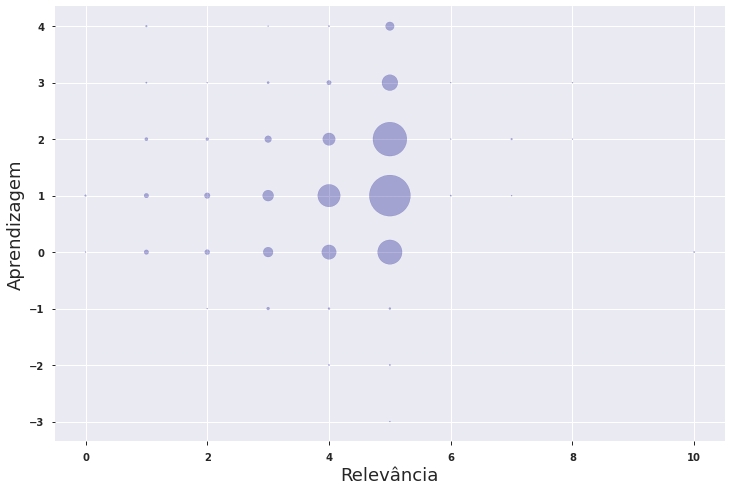

In [20]:
fig = bubble('relevance', 'learn', "Relevância", 'Aprendizagem')
fig.savefig('img/aprendizagem-vs-relevancia.png', dpi=300)

### Rítmo _versus_ aprendizagem

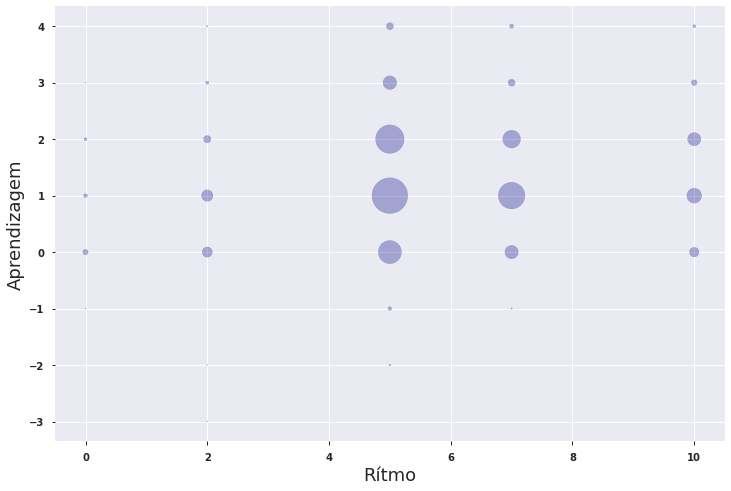

In [21]:
fig = bubble('pace', 'learn', 'Rítmo', 'Aprendizagem')
fig.savefig('img/aprendizagem-vs-ritmo.png', dpi=300)

### Satisfação _versus_ aprendizagem

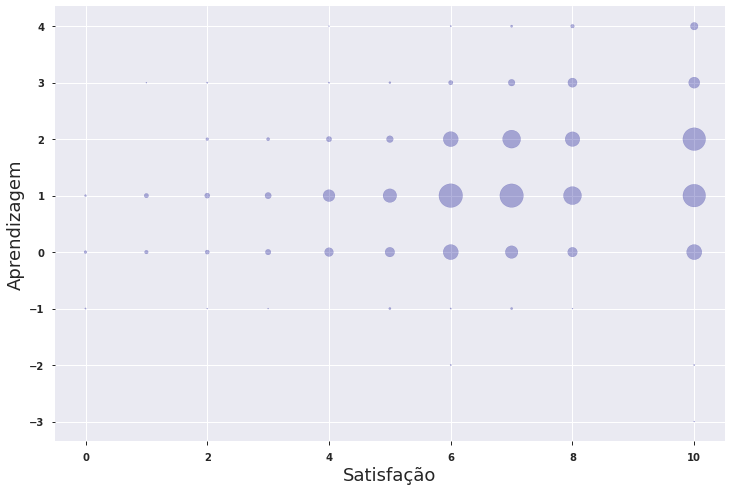

In [22]:
fig = bubble('satisfaction', 'learn', 'Satisfação', 'Aprendizagem')
fig.savefig('img/aprendizagem-vs-satisfacao.png', dpi=300)